### Import libraries and read data

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime as dt
from scipy.stats import poisson


In [2]:
os.chdir('..')
os.getcwd()

'/Users/benmurphy/Library/CloudStorage/OneDrive-Personal/github-projects/rugby/rugby'

In [3]:
raw_df = pd.read_csv("0_data/match_data/urc_matches.csv")
raw_df

,match_date_,Home team,Away team,home_n_tries,minutes_of_home_tries,away_n_tries,minutes_of_away_tries,home_n_pen_kicks,minutes_of_home_pen_kicks,away_n_pen_kicks,...,pkey,home_score,away_score,score_diff,home_pack_weight,away_pack_weight,home_forwards_ages,home_backs_ages,away_forwards_ages,away_backs_ages
0,2021-09-24,ZEBRE,LIONS,4.0,51_61_64_57,5.0,32_19_21_15_10,0.0,NaN,1.0,...,ZEBRE_LIONS_2021-09-24,26,38,-12,924,919,26,26,27,25
1,2021-09-24,CARDIFF,CONNACHT,5.0,38_50_69_9_73,2.0,12_80,0.0,NaN,3.0,...,CARDIFF_CONNACHT_2021-09-24,33,21,12,929,892,28,27,26,26
2,2021-09-24,ULSTER,GLASGOW,5.0,22_43_48_58_3,4.0,42_14_64_54,0.0,NaN,1.0,...,ULSTER_GLASGOW_2021-09-24,35,29,6,906,912,29,26,28,26
3,2021-09-25,MUNSTER,SHARKS,6.0,43_50_35_5_78_76,2.0,56_69,2.0,28_68,1.0,...,MUNSTER_SHARKS_2021-09-25,42,17,25,907,946,28,25,26,24
4,2021-09-25,BENETTON,STORMERS,3.0,15_58_70,2.0,1_43,1.0,62,2.0,...,BENETTON_STORMERS_2021-09-25,22,18,4,909,903,24,26,27,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,2025-05-17,LEINSTER,GLASGOW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LEINSTER_GLASGOW_2025-05-17,-1,-1,0,-1,-1,-1,-1,-1,-1
593,2025-05-17,BULLS,DRAGONS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,BULLS_DRAGONS_2025-05-17,-1,-1,0,-1,-1,-1,-1,-1,-1
594,2025-05-17,LIONS,OSPREYS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LIONS_OSPREYS_2025-05-17,-1,-1,0,-1,-1,-1,-1,-1,-1
595,2025-05-17,ZEBRE,CONNACHT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ZEBRE_CONNACHT_2025-05-17,-1,-1,0,-1,-1,-1,-1,-1,-1


In [4]:
raw_df.dtypes

match_date_                     object
Home team                       object
Away team                       object
home_n_tries                   float64
minutes_of_home_tries           object
away_n_tries                   float64
minutes_of_away_tries           object
home_n_pen_kicks               float64
minutes_of_home_pen_kicks       object
away_n_pen_kicks               float64
minutes_of_away_pen_kicks       object
home_n_conversions             float64
minutes_of_home_conversions     object
away_n_conversions             float64
minutes_of_away_conversions     object
competition                     object
round_stage                     object
pkey                            object
home_score                       int64
away_score                       int64
score_diff                       int64
home_pack_weight                 int64
away_pack_weight                 int64
home_forwards_ages               int64
home_backs_ages                  int64
away_forwards_ages       

In [5]:
matches = raw_df[['match_date_', 'Home team', 'Away team', 'home_n_tries', 'away_n_tries', 'pkey']].copy()

matches['Total Tries'] = matches['home_n_tries'] + matches['away_n_tries']

matches.sort_values(by='match_date_')

,match_date_,Home team,Away team,home_n_tries,away_n_tries,pkey,Total Tries
0,2021-09-24,ZEBRE,LIONS,4.0,5.0,ZEBRE_LIONS_2021-09-24,9.0
1,2021-09-24,CARDIFF,CONNACHT,5.0,2.0,CARDIFF_CONNACHT_2021-09-24,7.0
2,2021-09-24,ULSTER,GLASGOW,5.0,4.0,ULSTER_GLASGOW_2021-09-24,9.0
3,2021-09-25,MUNSTER,SHARKS,6.0,2.0,MUNSTER_SHARKS_2021-09-25,8.0
4,2021-09-25,BENETTON,STORMERS,3.0,2.0,BENETTON_STORMERS_2021-09-25,5.0
...,...,...,...,...,...,...,...
594,2025-05-17,LIONS,OSPREYS,NaN,NaN,LIONS_OSPREYS_2025-05-17,NaN
595,2025-05-17,ZEBRE,CONNACHT,NaN,NaN,ZEBRE_CONNACHT_2025-05-17,NaN
592,2025-05-17,LEINSTER,GLASGOW,NaN,NaN,LEINSTER_GLASGOW_2025-05-17,NaN
593,2025-05-17,BULLS,DRAGONS,NaN,NaN,BULLS_DRAGONS_2025-05-17,NaN


In [6]:
# create a season column
mask_24_25 = (matches['match_date_'] > '2024-07-31') & (matches['match_date_'] <= '2025-07-11')
mask_23_24 = (matches['match_date_'] > '2023-07-31') & (matches['match_date_'] <= '2024-07-11')
mask_22_23 = (matches['match_date_'] > '2022-07-31') & (matches['match_date_'] <= '2023-07-11')
mask_21_22 = (matches['match_date_'] > '2021-07-31') & (matches['match_date_'] <= '2022-07-11')

matches.loc[mask_24_25, "Season"] = "24/25 (5 rounds)"
matches.loc[mask_23_24, "Season"] = "23/24"
matches.loc[mask_22_23, "Season"] = "22/23"
matches.loc[mask_21_22, "Season"] = "21/22"

matches

,match_date_,Home team,Away team,home_n_tries,away_n_tries,pkey,Total Tries,Season
0,2021-09-24,ZEBRE,LIONS,4.0,5.0,ZEBRE_LIONS_2021-09-24,9.0,21/22
1,2021-09-24,CARDIFF,CONNACHT,5.0,2.0,CARDIFF_CONNACHT_2021-09-24,7.0,21/22
2,2021-09-24,ULSTER,GLASGOW,5.0,4.0,ULSTER_GLASGOW_2021-09-24,9.0,21/22
3,2021-09-25,MUNSTER,SHARKS,6.0,2.0,MUNSTER_SHARKS_2021-09-25,8.0,21/22
4,2021-09-25,BENETTON,STORMERS,3.0,2.0,BENETTON_STORMERS_2021-09-25,5.0,21/22
...,...,...,...,...,...,...,...,...
592,2025-05-17,LEINSTER,GLASGOW,NaN,NaN,LEINSTER_GLASGOW_2025-05-17,NaN,24/25 (5 rounds)
593,2025-05-17,BULLS,DRAGONS,NaN,NaN,BULLS_DRAGONS_2025-05-17,NaN,24/25 (5 rounds)
594,2025-05-17,LIONS,OSPREYS,NaN,NaN,LIONS_OSPREYS_2025-05-17,NaN,24/25 (5 rounds)
595,2025-05-17,ZEBRE,CONNACHT,NaN,NaN,ZEBRE_CONNACHT_2025-05-17,NaN,24/25 (5 rounds)


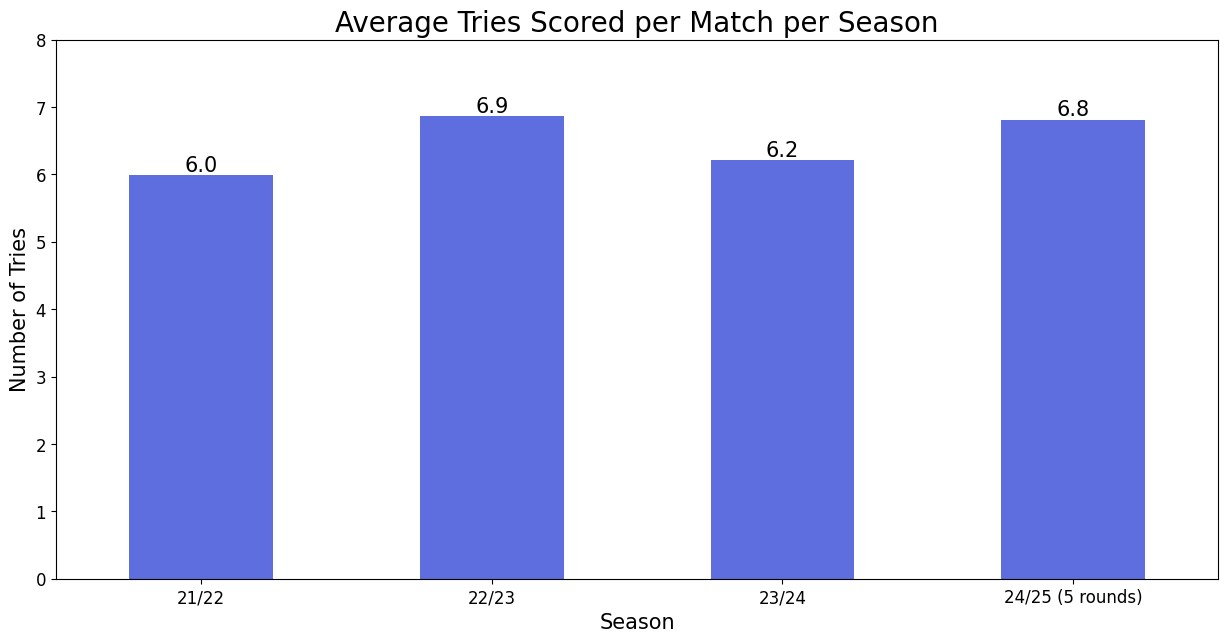

In [7]:
# create a subplot with 2 rows and 1 columns
fig, ax = plt.subplots(1,1, figsize=(15, 7))
# plt.grid(True)
sns.barplot(x="Season", y="Total Tries", 
            data=matches, 
            errorbar=None, 
            fill=True,
            gap=0.01,
           width=0.5,
           color='#4A5EF3')

bars_0 = ax.containers[0]
ax.bar_label(bars_0, labels=[f'{value:.1f}' for value in bars_0.datavalues], fontsize=15)

plt.ylim(0, 8)  # Set the y-axis limits from 0 to 8

ax.axes.set_title("Average Tries Scored per Match in each Season",fontsize=20)
ax.set_xlabel("Season",fontsize=15)
ax.set_ylabel("Number of Tries",fontsize=15)

ax.yaxis.set_tick_params(labelsize = 12);
ax.xaxis.set_tick_params(labelsize = 12);

plt.show()

### Data manipulation 
- we need to reshape our dataframe so that both the home and the away team have a row each and an indicator whether they are playing at home or away

In [120]:
common_features = ['pkey', 'match_date_', 'Home team', 'Away team', 'Season']

# home data
temp1 = matches[common_features+['home_n_tries', 'away_n_tries']]
temp1['Team Location'] = "Home Team"
temp1.rename(columns={"Home team": "Team",
                    "Away team": "Opponents",
                    "home_n_tries": "Tries Scored",
                     "away_n_tries": "Tries Conceded"},
                    inplace=True)

# away data
temp2 = matches[common_features + ['away_n_tries', 'home_n_tries']]
temp2['Team Location'] = "Away Team"
temp2.rename(columns={"Away team": "Team",
                    "Home team": "Opponents",
                    "away_n_tries": "Tries Scored",
                     "home_n_tries": "Tries Conceded"},
                    inplace=True)

# concat dfs together
team_per_row_df = pd.concat([temp1, temp2])
team_per_row_df.reset_index(inplace=True, drop=True)

team_per_row_df.rename(columns={"match_date_": "Match Date",
                    "pkey": "Primary Key"},
                    inplace=True)

team_per_row_df['Match Date'] = pd.to_datetime(team_per_row_df['Match Date'])

del(temp1)
del(temp2)

team_per_row_df.tail(16)

,Primary Key,Match Date,Team,Opponents,Season,Tries Scored,Tries Conceded,Team Location
1178,SHARKS_OSPREYS_2025-05-09,2025-05-09,OSPREYS,SHARKS,24/25 (5 rounds),NaN,NaN,Away Team
1179,MUNSTER_ULSTER_2025-05-09,2025-05-09,ULSTER,MUNSTER,24/25 (5 rounds),NaN,NaN,Away Team
1180,STORMERS_DRAGONS_2025-05-10,2025-05-10,DRAGONS,STORMERS,24/25 (5 rounds),NaN,NaN,Away Team
1181,LEINSTER_ZEBRE_2025-05-10,2025-05-10,ZEBRE,LEINSTER,24/25 (5 rounds),NaN,NaN,Away Team
1182,BENETTON_GLASGOW_2025-05-10,2025-05-10,GLASGOW,BENETTON,24/25 (5 rounds),NaN,NaN,Away Team
1183,CONNACHT_EDINBURGH_2025-05-10,2025-05-10,EDINBURGH,CONNACHT,24/25 (5 rounds),NaN,NaN,Away Team
1184,BULLS_CARDIFF_2025-05-10,2025-05-10,CARDIFF,BULLS,24/25 (5 rounds),NaN,NaN,Away Team
1185,LIONS_SCARLETS_2025-05-11,2025-05-11,SCARLETS,LIONS,24/25 (5 rounds),NaN,NaN,Away Team
1186,STORMERS_CARDIFF_2025-05-16,2025-05-16,CARDIFF,STORMERS,24/25 (5 rounds),NaN,NaN,Away Team
1187,EDINBURGH_ULSTER_2025-05-16,2025-05-16,ULSTER,EDINBURGH,24/25 (5 rounds),NaN,NaN,Away Team


In [121]:
# filter out any future fixtures, only keep historical results
today = dt.datetime.today()

df = team_per_row_df.loc[team_per_row_df['Match Date'] < today]

df = df.sort_values(by=['Match Date', 'Team Location'], ascending=[True, False])

df = df.reset_index(drop=True)

df.tail(16)

,Primary Key,Match Date,Team,Opponents,Season,Tries Scored,Tries Conceded,Team Location
966,SCARLETS_BULLS_2024-10-18,2024-10-18,SCARLETS,BULLS,24/25 (5 rounds),3.0,3.0,Home Team
967,ULSTER_OSPREYS_2024-10-18,2024-10-18,ULSTER,OSPREYS,24/25 (5 rounds),6.0,2.0,Home Team
968,SCARLETS_BULLS_2024-10-18,2024-10-18,BULLS,SCARLETS,24/25 (5 rounds),3.0,3.0,Away Team
969,ULSTER_OSPREYS_2024-10-18,2024-10-18,OSPREYS,ULSTER,24/25 (5 rounds),2.0,6.0,Away Team
970,DRAGONS_BENETTON_2024-10-19,2024-10-19,DRAGONS,BENETTON,24/25 (5 rounds),3.0,4.0,Home Team
971,SHARKS_GLASGOW_2024-10-19,2024-10-19,SHARKS,GLASGOW,24/25 (5 rounds),3.0,4.0,Home Team
972,CONNACHT_LEINSTER_2024-10-19,2024-10-19,CONNACHT,LEINSTER,24/25 (5 rounds),2.0,5.0,Home Team
973,EDINBURGH_CARDIFF_2024-10-19,2024-10-19,EDINBURGH,CARDIFF,24/25 (5 rounds),4.0,1.0,Home Team
974,ZEBRE_LIONS_2024-10-19,2024-10-19,ZEBRE,LIONS,24/25 (5 rounds),0.0,1.0,Home Team
975,STORMERS_MUNSTER_2024-10-19,2024-10-19,STORMERS,MUNSTER,24/25 (5 rounds),4.0,3.0,Home Team


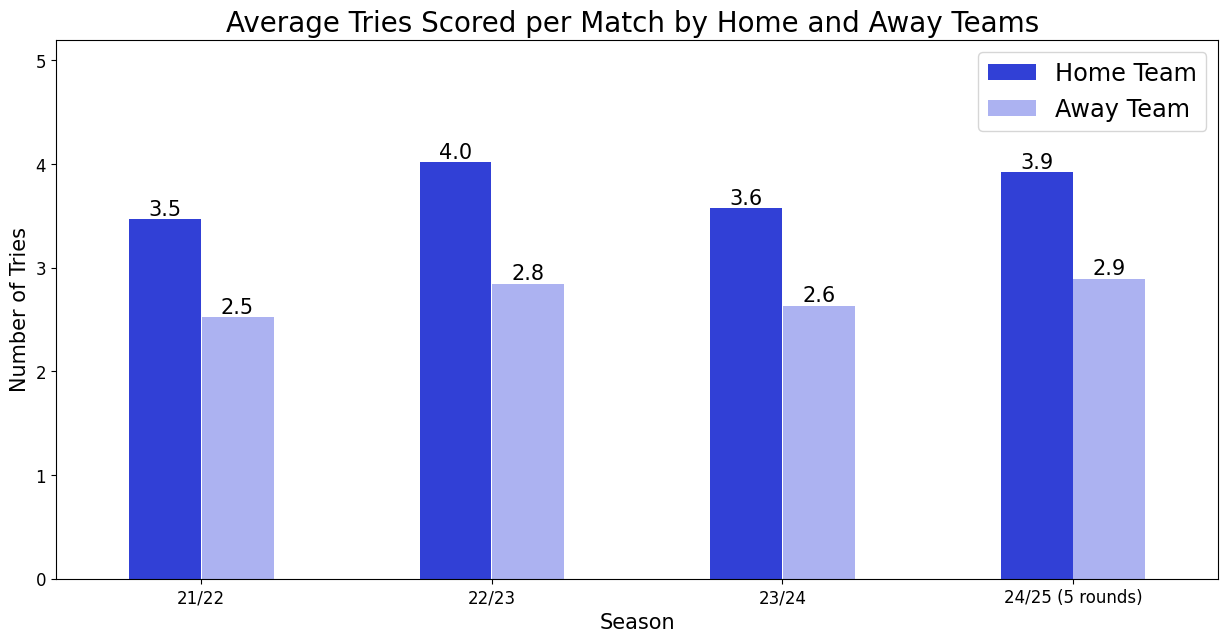

In [122]:
# create a subplot with 2 rows and 1 columns
fig, ax = plt.subplots(1,1, figsize=(15, 7))
# plt.grid(True)
sns.barplot(x="Season", hue="Team Location", y="Tries Scored", 
            data=df, 
            errorbar=None, 
            fill=True,
            gap=0.01,
            width=0.5,
            palette=['#1529F2', '#A1A9FC'])

bars_0 = ax.containers[0]
ax.bar_label(bars_0, labels=[f'{value:.1f}' for value in bars_0.datavalues], fontsize=15)

bars_1 = ax.containers[1]
ax.bar_label(bars_1, labels=[f'{value:.1f}' for value in bars_1.datavalues], fontsize=15)

plt.ylim(0, 5.2)  # Set the y-axis limits from 0 to 5

ax.axes.set_title("Average Tries Scored per Match by Home and Away Teams ",fontsize=20)
ax.set_xlabel("Season",fontsize=15)
ax.set_ylabel("Number of Tries",fontsize=15)

ax.yaxis.set_tick_params(labelsize = 12);
ax.xaxis.set_tick_params(labelsize = 12);
ax.legend(fontsize='xx-large')

plt.show()

## Tries scored per team

In [123]:
team_tries_home_away = df.groupby(["Team", "Team Location"])['Tries Scored'].mean().round(1) \
            .reset_index().sort_values(by=['Team', 'Team Location'], ascending=[True, False])

team_tries_pivot = team_tries_home_away.pivot(index = ['Team'], columns='Team Location', values='Tries Scored').reset_index().rename_axis(None, axis=1)

team_tries_pivot['Difference'] = team_tries_pivot['Home Team'] - team_tries_pivot['Away Team']

team_tries_pivot.sort_values(by='Difference', ascending=False)

,Team,Away Team,Home Team,Difference
1,BULLS,3.0,5.1,2.1
8,LIONS,2.2,4.2,2.0
7,LEINSTER,3.5,5.4,1.9
9,MUNSTER,2.8,4.3,1.5
5,EDINBURGH,2.5,3.9,1.4
13,STORMERS,2.7,3.9,1.2
3,CONNACHT,2.7,3.6,0.9
12,SHARKS,2.7,3.6,0.9
14,ULSTER,2.9,3.8,0.9
2,CARDIFF,2.3,3.1,0.8


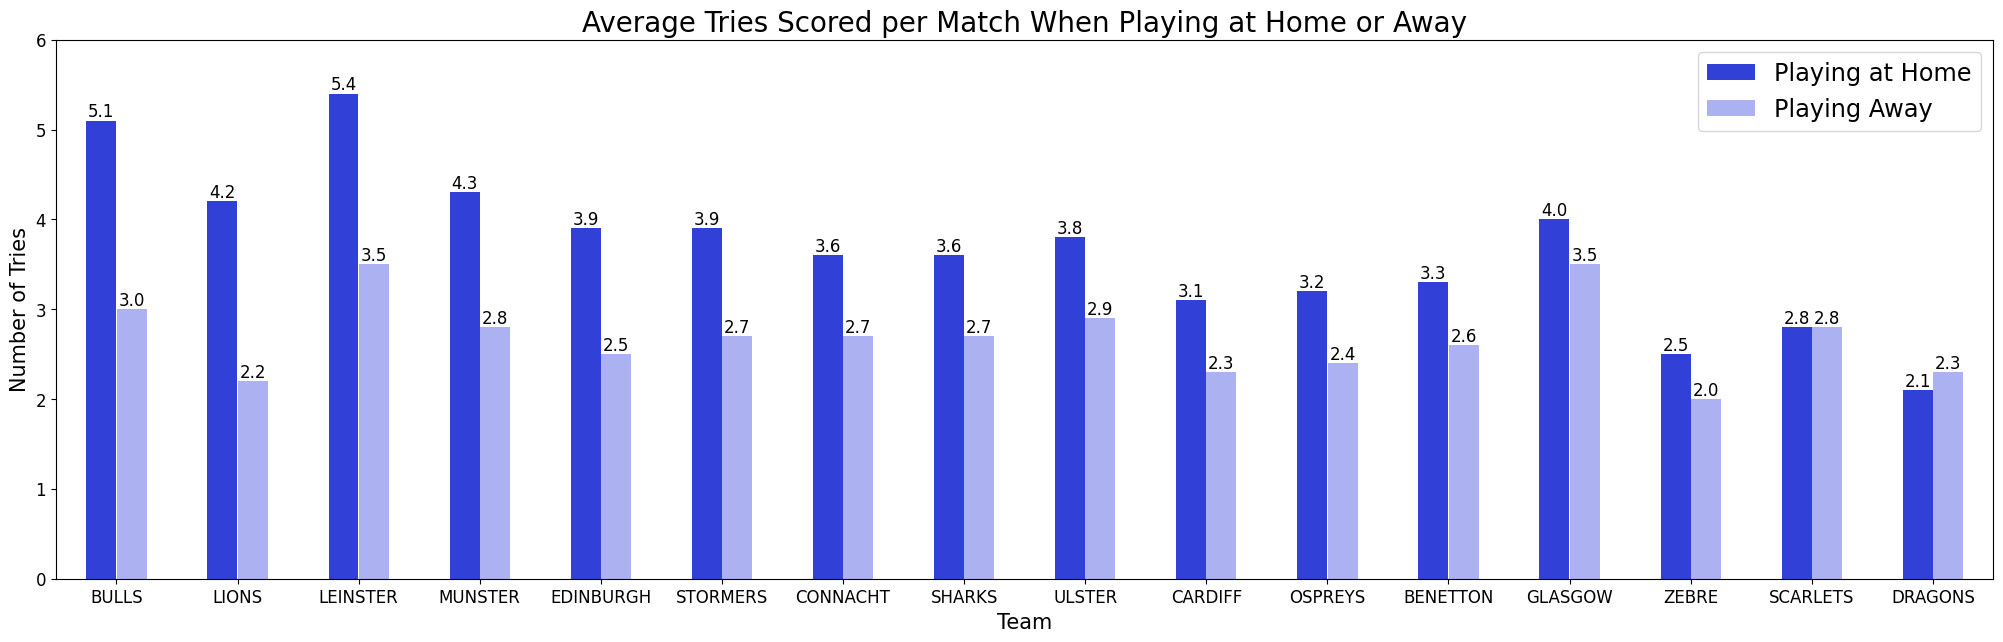

In [111]:

order = team_tries_pivot.sort_values(by='Difference', ascending=False)['Team'].tolist()

# create a subplot with 2 rows and 1 columns
fig, ax = plt.subplots(1,1, figsize=(25, 7))
# fig, ax = plt.subplots(1,1)

# plt.grid(True)
sns.barplot(x="Team", hue="Team Location", y="Tries Scored", 
            data=team_tries_home_away, 
            errorbar=None, 
            fill=True,
            gap=0.01,
            width=0.5,
            palette=['#1529F2', '#A1A9FC'],
           orient='v',
           order=order)

bars_0 = ax.containers[0]
ax.bar_label(bars_0, labels=[f'{value:.1f}' for value in bars_0.datavalues], fontsize=12)

bars_1 = ax.containers[1]
ax.bar_label(bars_1, labels=[f'{value:.1f}' for value in bars_1.datavalues], fontsize=12)

plt.ylim(0, 6)  # Set the y-axis limits from 0 to 5

ax.axes.set_title("Average Tries Scored per Match When Playing at Home or Away",fontsize=20)
ax.set_xlabel("Team",fontsize=15)
ax.set_ylabel("Number of Tries",fontsize=15)

ax.yaxis.set_tick_params(labelsize = 12);
ax.xaxis.set_tick_params(labelsize = 12);
ax.legend(['Playing at Home', 'Playing Away'], fontsize='xx-large')

plt.show()

## Tries conceded per team

In [129]:
team_tries_c_home_away = df.groupby(["Team", "Team Location"])['Tries Conceded'].mean().round(1) \
            .reset_index().sort_values(by=['Team', 'Team Location'], ascending=[True, False])



team_tries_c_pivot = team_tries_c_home_away.pivot(index = ['Team'], columns='Team Location', values='Tries Conceded').reset_index().rename_axis(None, axis=1)

team_tries_c_pivot['Difference'] = team_tries_c_pivot['Away Team'] - team_tries_c_pivot['Home Team']

team_tries_c_pivot.sort_values(by='Difference', ascending=True)

,Team,Away Team,Home Team,Difference
8,LIONS,3.2,3.3,-0.1
1,BULLS,2.8,2.6,0.2
9,MUNSTER,2.4,2.2,0.2
2,CARDIFF,3.7,3.3,0.4
13,STORMERS,2.7,2.2,0.5
14,ULSTER,3.1,2.3,0.8
5,EDINBURGH,3.3,2.4,0.9
7,LEINSTER,2.7,1.8,0.9
15,ZEBRE,5.8,4.7,1.1
12,SHARKS,3.6,2.5,1.1


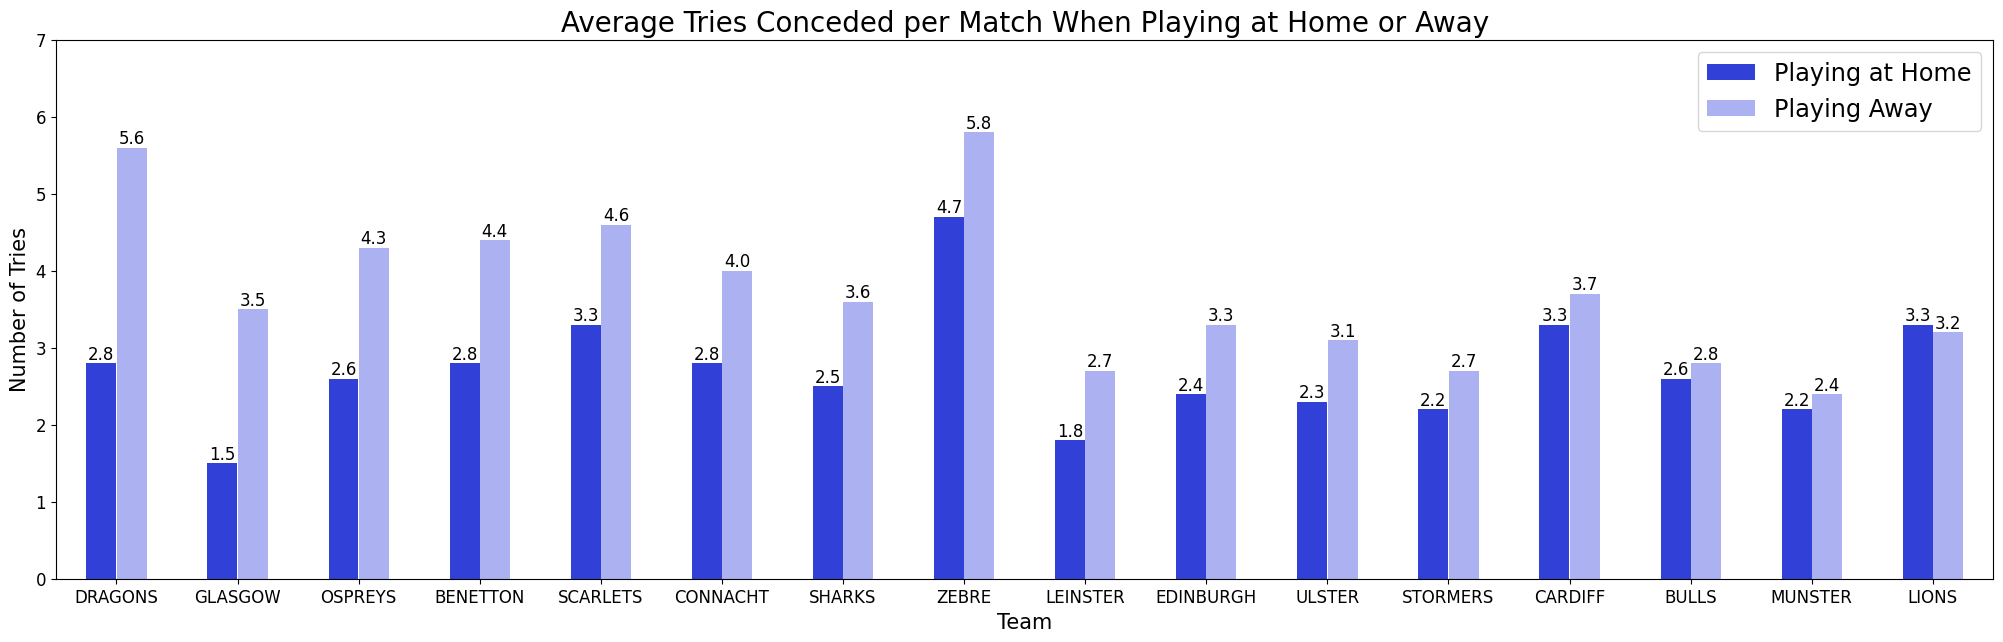

In [132]:

order = team_tries_c_pivot.sort_values(by='Difference', ascending=False)['Team'].tolist()

# create a subplot with 2 rows and 1 columns
fig, ax = plt.subplots(1,1, figsize=(25, 7))
# fig, ax = plt.subplots(1,1)

# plt.grid(True)
sns.barplot(x="Team", hue="Team Location", y="Tries Conceded", 
            data=team_tries_c_home_away, 
            errorbar=None, 
            fill=True,
            gap=0.01,
            width=0.5,
            palette=['#1529F2', '#A1A9FC'],
           orient='v',
           order=order)

bars_0 = ax.containers[0]
ax.bar_label(bars_0, labels=[f'{value:.1f}' for value in bars_0.datavalues], fontsize=12)

bars_1 = ax.containers[1]
ax.bar_label(bars_1, labels=[f'{value:.1f}' for value in bars_1.datavalues], fontsize=12)

plt.ylim(0, 7)  # Set the y-axis limits from 0 to 5

ax.axes.set_title("Average Tries Conceded per Match When Playing at Home or Away",fontsize=20)
ax.set_xlabel("Team",fontsize=15)
ax.set_ylabel("Number of Tries",fontsize=15)

ax.yaxis.set_tick_params(labelsize = 12);
ax.xaxis.set_tick_params(labelsize = 12);
ax.legend(['Playing at Home', 'Playing Away'], fontsize='xx-large')

plt.show()

# Poisson

In [133]:
df

,Primary Key,Match Date,Team,Opponents,Season,Tries Scored,Tries Conceded,Team Location
0,ZEBRE_LIONS_2021-09-24,2021-09-24,ZEBRE,LIONS,21/22,4.0,5.0,Home Team
1,CARDIFF_CONNACHT_2021-09-24,2021-09-24,CARDIFF,CONNACHT,21/22,5.0,2.0,Home Team
2,ULSTER_GLASGOW_2021-09-24,2021-09-24,ULSTER,GLASGOW,21/22,5.0,4.0,Home Team
3,ZEBRE_LIONS_2021-09-24,2021-09-24,LIONS,ZEBRE,21/22,5.0,4.0,Away Team
4,CARDIFF_CONNACHT_2021-09-24,2021-09-24,CONNACHT,CARDIFF,21/22,2.0,5.0,Away Team
...,...,...,...,...,...,...,...,...
977,SHARKS_GLASGOW_2024-10-19,2024-10-19,GLASGOW,SHARKS,24/25 (5 rounds),4.0,3.0,Away Team
978,CONNACHT_LEINSTER_2024-10-19,2024-10-19,LEINSTER,CONNACHT,24/25 (5 rounds),5.0,2.0,Away Team
979,EDINBURGH_CARDIFF_2024-10-19,2024-10-19,CARDIFF,EDINBURGH,24/25 (5 rounds),1.0,4.0,Away Team
980,ZEBRE_LIONS_2024-10-19,2024-10-19,LIONS,ZEBRE,24/25 (5 rounds),1.0,0.0,Away Team


2.6863543788187374

In [134]:
# what we need:


# average tries scored home and away
home_avg_tries_scored = df.groupby('Team Location')['Tries Scored'].mean()['Home Team']
away_avg_tries_scored = df.groupby('Team Location')['Tries Scored'].mean()['Away Team']

# average tries conceded home and away
home_avg_tries_conceded = df.groupby('Team Location')['Tries Conceded'].mean()['Home Team']
away_avg_tries_conceded = df.groupby('Team Location')['Tries Conceded'].mean()['Away Team']



home_avg_tries_scored, away_avg_tries_scored, home_avg_tries_conceded, away_avg_tries_conceded

(3.706720977596741, 2.6863543788187374, 2.6863543788187374, 3.706720977596741)

In [148]:
temp1 = team_tries_pivot[['Team', 'Away Team', 'Home Team']].copy()
temp1.rename(columns={"Away Team": "Tries Scored Away",
                    "Home Team": "Tries Scored Home"},
           inplace=True)

temp2 = team_tries_c_pivot[['Team', 'Away Team', 'Home Team']].copy()
temp2.rename(columns={"Away Team": "Tries Conceded Away",
                    "Home Team": "Tries Conceded Home"},
           inplace=True)


poisson_df = pd.merge(temp1, temp2)

del(temp1, temp2)

poisson_df

,Team,Tries Scored Away,Tries Scored Home,Tries Conceded Away,Tries Conceded Home
0,BENETTON,2.6,3.3,4.4,2.8
1,BULLS,3.0,5.1,2.8,2.6
2,CARDIFF,2.3,3.1,3.7,3.3
3,CONNACHT,2.7,3.6,4.0,2.8
4,DRAGONS,2.3,2.1,5.6,2.8
5,EDINBURGH,2.5,3.9,3.3,2.4
6,GLASGOW,3.5,4.0,3.5,1.5
7,LEINSTER,3.5,5.4,2.7,1.8
8,LIONS,2.2,4.2,3.2,3.3
9,MUNSTER,2.8,4.3,2.4,2.2


In [151]:
poisson_df['Away Attack Strength'] = poisson_df['Tries Scored Away'] / away_avg_tries_scored
poisson_df['Home Attack Strength'] = poisson_df['Tries Scored Home'] / home_avg_tries_scored

poisson_df['Away Defence Strength'] = poisson_df['Tries Conceded Away'] / away_avg_tries_conceded
poisson_df['Home Defence Strength'] = poisson_df['Tries Conceded Home'] / home_avg_tries_conceded

poisson_df

,Team,Tries Scored Away,Tries Scored Home,Tries Conceded Away,Tries Conceded Home,Away Attack Strength,Home Attack Strength,Away Defence Strength,Home Defence Strength
0,BENETTON,2.6,3.3,4.4,2.8,0.967854,0.890275,1.187033,1.042305
1,BULLS,3.0,5.1,2.8,2.6,1.116755,1.375879,0.755385,0.967854
2,CARDIFF,2.3,3.1,3.7,3.3,0.856179,0.836319,0.998187,1.228431
3,CONNACHT,2.7,3.6,4.0,2.8,1.005080,0.971209,1.079121,1.042305
4,DRAGONS,2.3,2.1,5.6,2.8,0.856179,0.566538,1.510769,1.042305
5,EDINBURGH,2.5,3.9,3.3,2.4,0.930629,1.052143,0.890275,0.893404
6,GLASGOW,3.5,4.0,3.5,1.5,1.302881,1.079121,0.944231,0.558378
7,LEINSTER,3.5,5.4,2.7,1.8,1.302881,1.456813,0.728407,0.670053
8,LIONS,2.2,4.2,3.2,3.3,0.818954,1.133077,0.863297,1.228431
9,MUNSTER,2.8,4.3,2.4,2.2,1.042305,1.160055,0.647473,0.818954


1.456813186813187

In [175]:

fixtures = [
    ('LEINSTER', 'LIONS'),
    ('SHARKS', 'MUNSTER')
]


for f in fixtures:
    print("\n\n\n")
    print(f"{f[0]} vs {f[1]}")
    h_att = poisson_df.loc[poisson_df['Team']==f[0], 'Home Attack Strength'].iloc[0]
    a_def = poisson_df.loc[poisson_df['Team']==f[1], 'Away Defence Strength'].iloc[0]

    h_def = poisson_df.loc[poisson_df['Team']==f[0], 'Home Defence Strength'].iloc[0]
    a_att = poisson_df.loc[poisson_df['Team']==f[1], 'Away Attack Strength'].iloc[0]


    # Get probabilities
    # calculate poisson distribution of tries for home and away teams
    X = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
    xTries_home_team = h_att * a_def * home_avg_tries_scored
    xTries_home_poisson = poisson.pmf(X, xTries_home_team)

    xTries_away_team = a_att * h_def * away_avg_tries_scored
    xTries_away_poisson = poisson.pmf(X, xTries_away_team)
    
    print(f"{f[0]}(H) TRIES IN MATCH: ")
    home_tries_prob = pd.DataFrame({'total_tries': X, 'prob': [str(round(i*100, 1))+"%" for i in xTries_home_poisson]})
    print(home_tries_prob)
    
    print(f"\n{f[1]}(A) TRIES IN MATCH: ")
    away_tries_prob = pd.DataFrame({'total_tries': X, 'prob': [str(round(i*100, 1))+"%" for i in xTries_away_poisson]})
    print(away_tries_prob)
    

    ####### home tries #######
    print(f"HOME TRIES IN MATCH: {f[0]}")
    home_tries_prob = pd.DataFrame({'prob': [i*100 for i in xTries_home_poisson],
                                    'total_tries': X})

    lines = [2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]
    for line in lines:
        temp = home_tries_prob.loc[home_tries_prob['total_tries']<line]
        under = temp['prob'].sum()
        over = 100-under
        print()
        print(f"Over {line} tries: {round( ( ( (1/over) - 1 ) + 1 ) * 100, 2) }")
        print(f"Under {line} tries: {round( ( ( (1/under) - 1 ) + 1 ) * 100, 2) }")


    






LEINSTER vs LIONS
LEINSTER(H) TRIES IN MATCH: 
    total_tries   prob
0             0   0.9%
1             1   4.4%
2             2  10.3%
3             3  16.0%
4             4  18.6%
5             5  17.3%
6             6  13.5%
7             7   9.0%
8             8   5.2%
9             9   2.7%
10           10   1.3%
11           11   0.5%

LIONS(A) TRIES IN MATCH: 
    total_tries   prob
0             0  22.9%
1             1  33.8%
2             2  24.9%
3             3  12.2%
4             4   4.5%
5             5   1.3%
6             6   0.3%
7             7   0.1%
8             8   0.0%
9             9   0.0%
10           10   0.0%
11           11   0.0%
HOME TRIES IN MATCH: LEINSTER

Over 2.5 tries: 1.19
Under 2.5 tries: 6.4

Over 3.5 tries: 1.46
Under 3.5 tries: 3.17

Over 4.5 tries: 2.01
Under 4.5 tries: 1.99

Over 5.5 tries: 3.08
Under 5.5 tries: 1.48

Over 6.5 tries: 5.26
Under 6.5 tries: 1.23

Over 7.5 tries: 9.95
Under 7.5 tries: 1.11

Over 8.5 tries: 20.73
Under 8.

HOME TRIES IN MATCH: SHARKS

Over 2.5 tries: 2.43
Under 2.5 tries: 1.7

Over 3.5 tries: 4.83
Under 3.5 tries: 1.26

Over 4.5 tries: 11.44
Under 4.5 tries: 1.1

Over 5.5 tries: 31.58
Under 5.5 tries: 1.03

Over 6.5 tries: 99.85
Under 6.5 tries: 1.01

Over 7.5 tries: 356.53
Under 7.5 tries: 1.0

Over 8.5 tries: 1420.26
Under 8.5 tries: 1.0

Over 9.5 tries: 6248.85
Under 9.5 tries: 1.0
